<a href="https://colab.research.google.com/github/Alisa-Shikanyan/ABD-4-students-grades/blob/main/Hypothesis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ факторов, влияющих на успеваемость студентов

## Подготовка к работе

In [2]:
# Импорт необходимых для работы библиотек

import pandas as pd
from scipy import stats as st
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Отключение предупреждений в итоговом отчёте

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Выгрузка предобработанной версии датасета `jamb`

jamb = pd.read_csv('/Users/mimikhailova/ВШЭ/jamb.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mimikhailova/ВШЭ/jamb.csv'

In [ ]:
jamb.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,Unknown,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


## Проверка гипотез

### Верно ли, что студенты, проживающие ближе к месту обучения, сдают экзамены лучше?

**Предпосылки:**  студенты, которые живут далеко от школы, начинают свой день раньше остальных. Не исключено, что из-за этого они меньше спят и соответственно меньше отдыхают. Утренняя дорога - это нагрузка на организм, которая приводит к снижению уровня энергии, с которой студент начинает учебный день. Из-за этого он может быть менее сконцентрирован и вовлечен в процесс, а значит может и хуже усваивать материал.

Медианное значение расстояния равно 10.0 км, то есть ровно половина студентов проживает на расстоянии менее 10 км от школы, а ровно половина – более. Сделаем срезы на основании этого значения:

In [ ]:
distance_less = jamb[jamb['distance_to_school'] <= 10]
distance_more = jamb[jamb['distance_to_school'] > 10]

Чтобы сформулировать гипотезы и выбрать нужный тест, проверим данные на нормальность с помощью теста Шапиро-Уилка:

In [ ]:
# Тест Шапиро-Уилка

shapiro_less = st.shapiro(distance_less['jamb_score'])
print(f"Для расстояния <=10 км: statistic = {shapiro_less.statistic}, p-value = {shapiro_less.pvalue}")

shapiro_more = st.shapiro(distance_more['jamb_score'])
print(f"Для расстояния >10 км:statistic = {shapiro_more.statistic}, p-value = {shapiro_more.pvalue}")

alpha = 0.05

if shapiro_less.pvalue < alpha:
    print("Данные в группе c расстоянием не более 10 км до школы не распределены нормально")
else:
    print("Данные в группе c расстоянием не более 10 км до школы распределены нормально")

if shapiro_more.pvalue < alpha:
    print("Данные в группе c расстоянием более 10 км до школы не распределены нормально")
else:
    print("Данные в группе c расстоянием более 10 км до школы распределены нормально")

Для расстояния <=10 км: statistic = 0.9704516530036926, p-value = 1.7256705906234346e-22
Для расстояния >10 км:statistic = 0.9645575284957886, p-value = 4.214185280264293e-24
Данные в группе c расстоянием не более 10 км до школы не распределены нормально
Данные в группе c расстоянием более 10 км до школы не распределены нормально


Видим, что данные обеих групп не распределены нормально, поэтому использовать t-тест нежелательно.

В таком случае воспользуемся **тестом Манна-Уитни** для сравнения двух независимых групп. Сформулируем гипотезы:

**Нулевая гипотеза Н0:** распределения баллов JAMB у студентов, проживающих ≤10 км и >10 км от школы, одинаковы.

**Альтернативная правосторонняя гипотеза Н1**: у студентов, которые живут ближе к школе (≤10 км), распределение баллов за экзамен смещено в сторону более высоких значений по сравнению с распределением баллов у студентов, проживающих >10 км от школы.

In [ ]:
# Тест Манна-Уитни для двух независимых выборок

alpha = 0.05

result = st.mannwhitneyu(distance_less['jamb_score'], distance_more['jamb_score'], alternative='greater')

print(f"U-статистика: {result.statistic:.2f}, p-значение: {result.pvalue}")

if result.pvalue < alpha:
      print('Отвергаем нулевую гипотезу')
else:
      print('Не получилось отвергнуть нулевую гипотезу')

U-статистика: 3390343.50, p-значение: 8.99400123779393e-08
Отвергаем нулевую гипотезу


📌 **Выводы:**
* Результаты теста Манна-Уитни показали статистически значимое различие между баллами JAMB студентов, проживающих на расстоянии менее или равном 10 км от школы, и студентов, проживающих дальше. Р-значение значительно меньше уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Баллы студентов, живущих ближе к школе, статистически выше, чем баллы студентов, живущих на большем расстоянии.

In [5]:
# Загрузим файл с данными
from google.colab import files
uploaded = files.upload()

# Чтение CSV-файла
df = pd.read_csv("jamb.csv")

Saving jamb.csv to jamb.csv


In [6]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,Unknown,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


**Гипотеза 2:**
Мужчины и женщины демонстрируют статистически значимые различия в успеваемости, выраженные через количество выполненных заданий (assignments_completed), при этом мужчины тратят больше времени на обучение (study_hours_per_week), но женщины показывают более высокую посещаемость (attendance_rate) и чаще используют дополнительные ресурсы (access_to_learning_materials).

**Предпосылки:**
1. Социальные факторы : Традиционно считается, что девушки склонны к более дисциплинированному подходу к учебе, что может проявляться в более высокой посещаемости и регулярности выполнения домашних заданий.
2. Разница в мотивации и поведении : Мужчины могут уделять больше внимания самообразованию вне формальной системы (например, самостоятельное изучение предметов), что может отражаться в большем количестве часов, потраченных на учебу.
3. Доступ к ресурсам : Женщины могут быть более активными в использовании доступных материалов, поскольку они чаще зависят от структурированных методов обучения.
4. Успех в образовании : Некоторые исследования показывают, что женщины имеют тенденцию к лучшей успеваемости в школах, особенно в гуманитарных и социальных науках, что может коррелировать с числом выполненных заданий.

Нормальность для мужчин: False
Нормальность для женщин: False


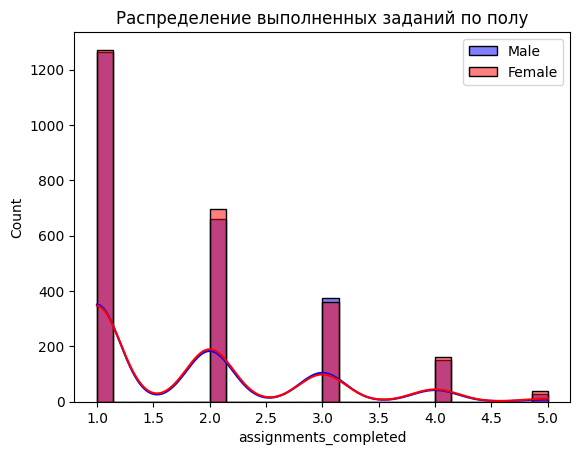

In [7]:
# Разделение данных по полу
male_assignments = df[df['gender'] == 'Male']['assignments_completed']
female_assignments = df[df['gender'] == 'Female']['assignments_completed']

# Проверка нормальности распределения
def check_normality(data):
    stat, p = stats.shapiro(data)
    return p > 0.05  # Если p > 0.05, то нормальное распределение

is_male_normal = check_normality(male_assignments)
is_female_normal = check_normality(female_assignments)

print("Нормальность для мужчин:", is_male_normal)
print("Нормальность для женщин:", is_female_normal)

# График распределения
sns.histplot(male_assignments, kde=True, label='Male', color='blue')
sns.histplot(female_assignments, kde=True, label='Female', color='red')
plt.title('Распределение выполненных заданий по полу')
plt.legend()
plt.show()

In [8]:
# Выбор теста
if is_male_normal and is_female_normal:
    # T-тест
    t_stat, p_val = stats.ttest_ind(male_assignments, female_assignments, equal_var=False)
    print(f"✅ T-тест: t={t_stat:.3f}, p={p_val:.3f}")
else:
    # Тест Манна-Уитни
    u_stat, p_val = stats.mannwhitneyu(male_assignments, female_assignments)
    print(f"✅ Тест Манна-Уитни: U={u_stat:.3f}, p={p_val:.3f}")

# Интерпретация результата
alpha = 0.05
if p_val < alpha:
    print("🔹 Отвергаем нулевую гипотезу: есть значимая разница между полами.")
else:
    print("🔸 Не отвергаем нулевую гипотезу: разница не является статистически значимой.")

✅ Тест Манна-Уитни: U=3098038.000, p=0.572
🔸 Не отвергаем нулевую гипотезу: разница не является статистически значимой.


p = 0.572 — это значение больше стандартного уровня значимости α = 0.05 .
Это означает, что разница между мужчинами и женщинами в количестве выполненных заданий (assignments_completed) :
Не является статистически значимой ,
То есть мы не можем утверждать , что различия, если они есть, вызваны полом.


In [9]:
# Сравнение study_hours_per_week
male_study = df[df['gender'] == 'Male']['study_hours_per_week']
female_study = df[df['gender'] == 'Female']['study_hours_per_week']

# Сравнение attendance_rate
male_attendance = df[df['gender'] == 'Male']['attendance_rate']
female_attendance = df[df['gender'] == 'Female']['attendance_rate']

# Сравнение access_to_learning_materials
male_access = df[df['gender'] == 'Male']['access_to_learning_materials'].map({'Yes': 1, 'No': 0})
female_access = df[df['gender'] == 'Female']['access_to_learning_materials'].map({'Yes': 1, 'No': 0})

# Пример: сравнение часов обучения
print("\nСравнение времени на обучение:")
if check_normality(male_study) and check_normality(female_study):
    t_stat, p_val = stats.ttest_ind(male_study, female_study)
else:
    u_stat, p_val = stats.mannwhitneyu(male_study, female_study)
print(f"p = {p_val:.3f}")


Сравнение времени на обучение:
p = 0.441


Анализ показал, что различие в количестве часов, потраченных на учебу, между мужчинами и женщинами не является статистически значимым (p = 0.441). Таким образом, на основе имеющихся данных нельзя утверждать, что пол ученика влияет на продолжительность самостоятельной работы над учебным материалом.